In [1]:
import numpy as np
import pandas as pd

data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_all = data_train.append(data_test, sort=True)

In [2]:
#data_all.info()

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

# 加载seabon
import seaborn as sns


In [7]:
# 将第一行设置为ID行
df = pd.read_csv("Pokemon.csv", index_col = 0)

print(df.info())
# 读取前5行数据
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB
None


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## 用seaborn绘图

X轴显示Attack数据，y轴显示Defense数据

$lmplot$是用来画回归图的

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


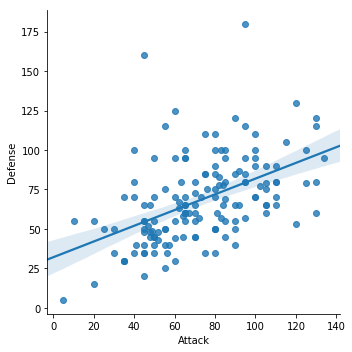

In [8]:
sns.lmplot(x = "Attack", y = 'Defense', data = df)

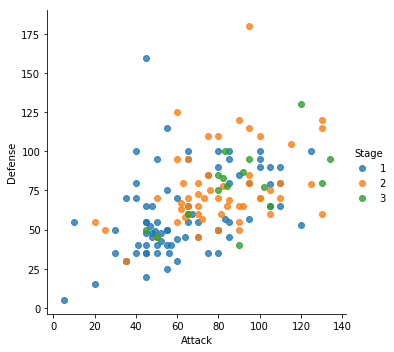

In [9]:
# 移去回归线，用不同颜色来表示pokemon的进化阶段

sns.lmplot(x = 'Attack', y = 'Defense', data = df, fit_reg = False, hue = 'Stage')

因为X,Y轴不是从0开始的

利用Matplotlib的ylim()和xlim()函数来设置数轴的范围

(0, 1.0)

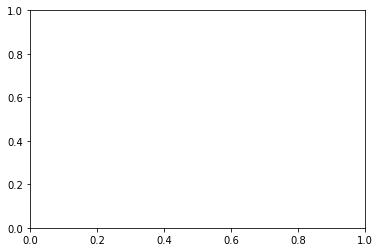

In [12]:
plt.xlim(0, None)
plt.ylim(0, None)

## Pandas的作用

根据Pokemon的攻击数据来绘制箱形图


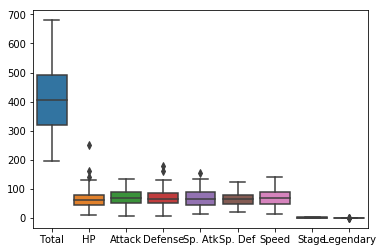

In [13]:
#Boxplot

sns.boxplot(data = df)

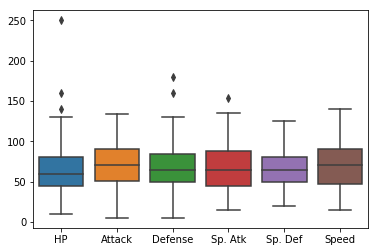

In [14]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)
sns.boxplot(data = stats_df)

##  Seaborn主题
默认主题为'darkgrid'

把主题改为"Whitegrid"来创建一个小提请图

* 小提琴图常常作为箱形图的替代
* 小提琴图通过小提琴的厚度展示了数据的分布，而不仅仅是总结数据

根据Pokemon的主要类型，我们可以将Attack的分布可视化

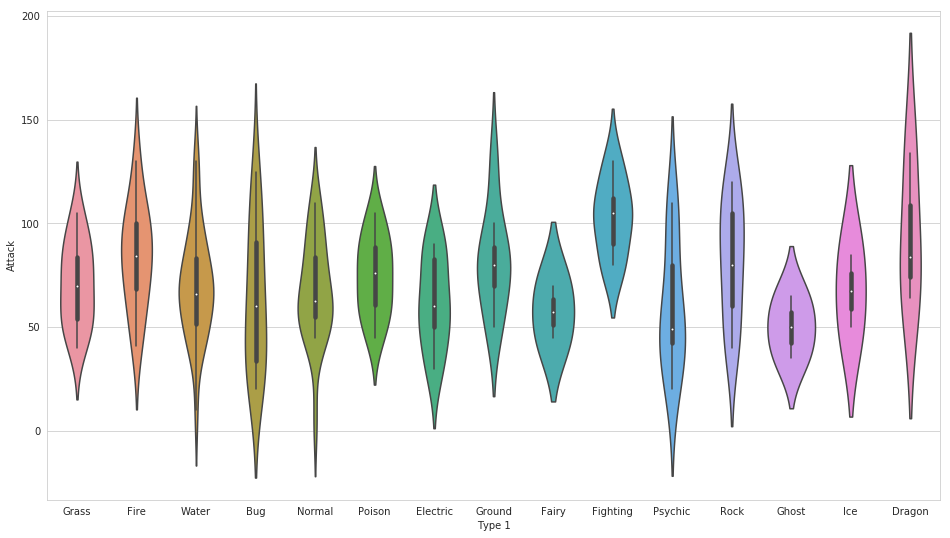

In [17]:
# 设置主题
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (16.0, 9.0) # 设置figure_size尺寸

#violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

##  群集图

使用群集图可以显示所有的Pokemon

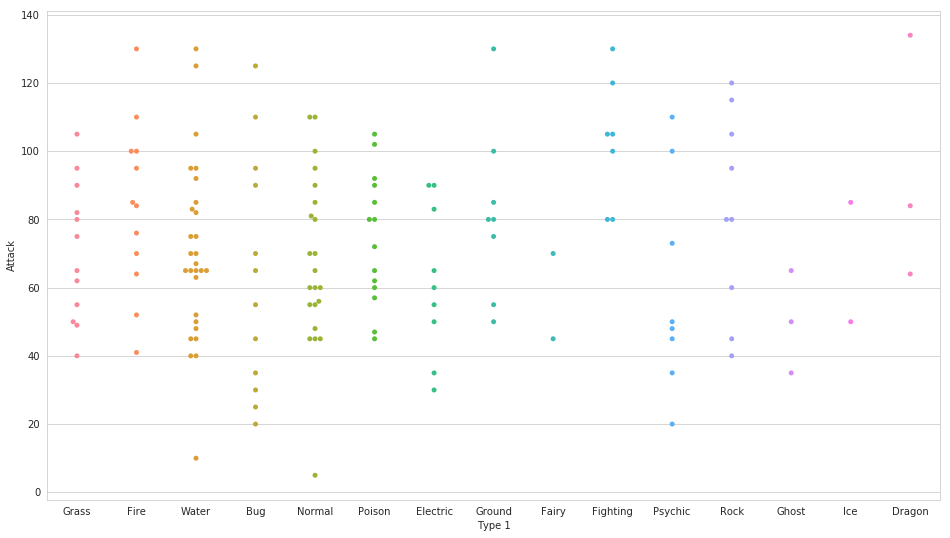

In [18]:
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df)

## 图形重叠

将小提琴图和群集图整合到一张图上，步骤如下：
* 首先，用Matplotlib设置图形比例
* 然后绘制小提琴图，用inner = None 将小提琴中的木杆移去
* 接着绘制群集图，病将数据点的颜色变为黑色
* 最后，用Matplotlib设置一个标题


Text(0.5,1,'Attack by Type')

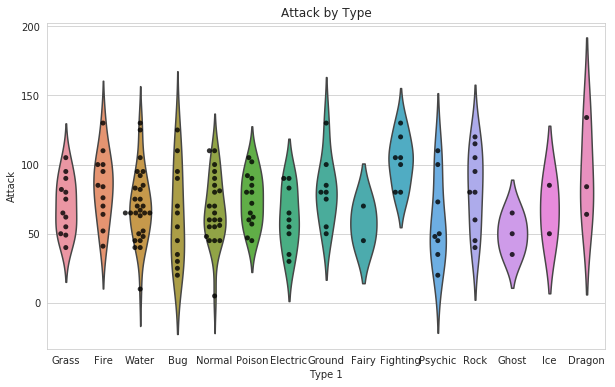

In [21]:
plt.figure(figsize = (10,6))

sns.violinplot(x = 'Type 1', y = "Attack", data = df, inner = None)

sns.swarmplot(x= 'Type 1', y = 'Attack', data = df, color = 'k', alpha = 0.8)

plt.title("Attack by Type")

## Histogram 直方图

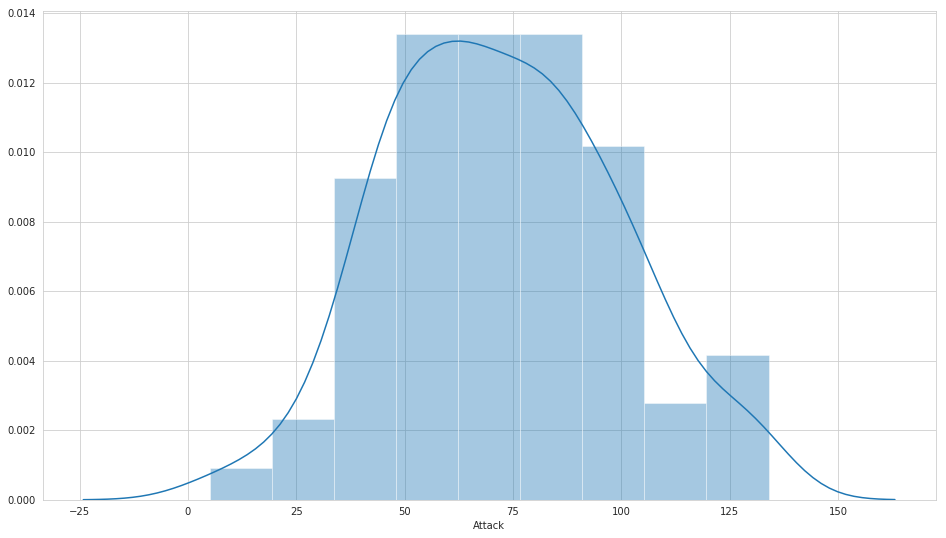

In [23]:
sns.distplot(df.Attack)

## 条形图

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

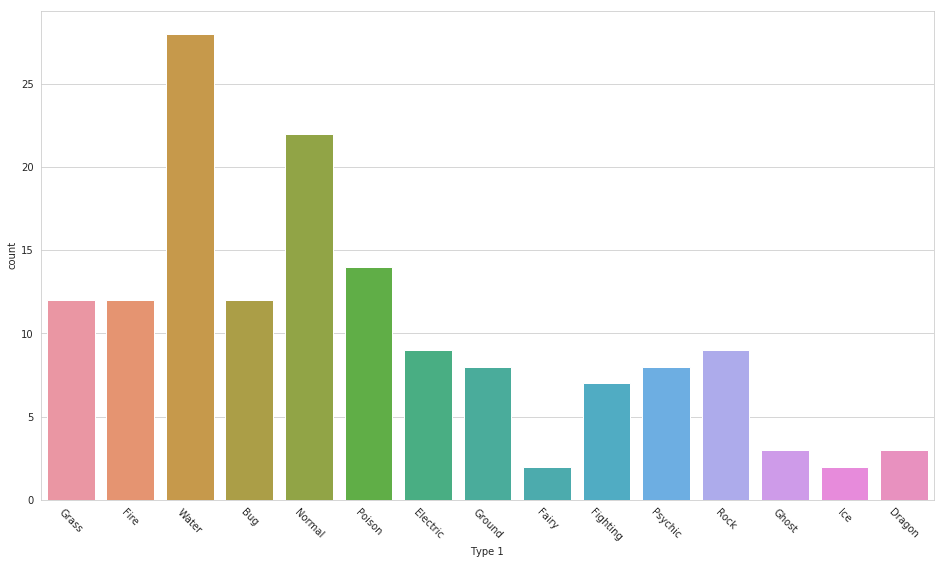

In [24]:
sns.countplot(x = 'Type 1', data = df)
plt.xticks(rotation = -45)